# IEOR 243 Group 10 Models

Recall that in Module 2, we performed a zero-shot learning to generate labels for the clustered models. With help the from the teaching team, we've decided to use the generated labels as ground truth to train new models. See the system diagram below.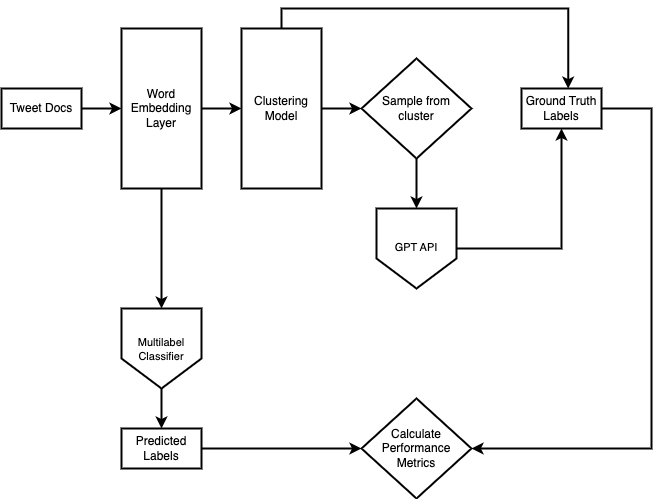

In [12]:
# Imports 
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

## K-Means Clustering

Runs pretty fast

In [6]:
# # Load in the embeddings 
# path = "../data/X20_embeddings.csv.zip"
# df = pd.read_csv(path)

In [31]:
# Train the Kmeans clustering model with 8 clusters (from Module 2)
kmeans = KMeans(n_clusters = 8, random_state = 1)
kmeans = kmeans.fit(df)

/Users/bennettcohen/miniconda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Grab the labels from GPT API from Module 2
labels = {
    1: ['social issues', 'personal development', 'business and economics', 'community building'],
    2: ['india', 'updates', 'testing', 'fatalities', 'recoveries', 'healthcare'],
    3: ['face masks', 'safety', 'protection', 'public health', 'prevention'],
    4: ['social media', 'resilience', 'community support', 'online events'],
    5: ['global', 'cases', 'deaths', 'statistics'],
    6: ['politics', 'government response', 'public health', 'conspiracy', 'human rights'],
    7: ['health', 'information','vacccine', 'public awareness'],
    8: ['layoffs', 'misinofrmation', 'mental health', 'lockdown', 'access', 'financial impact', 'political response', 'education']
}

In [32]:
# Add the labels as ground truth
df['cluster'] = kmeans.predict(df)

# Add a column caled labels which is a list of strings
df['labels'] = df['cluster'].apply(lambda x: labels[x+1])

## Multilabel Classification

As the name suggests, we have multiple labels that apply to each example in our data. We can't run sin

In [36]:
# Split the data 70/30
train, test = train_test_split(df, test_size = 0.3)

# Remove non-training cols and split to X,y
drop_cols = ['cluster', 'labels']
X_train, X_test = train.drop(drop_cols, axis = 1), test.drop(drop_cols, axis = 1)

# One-hot encode the list of labels to multioutputs
y_train = train['labels'].str.get_dummies(sep =',')
y_test = test['labels'].str.get_dummies(sep =',')

In [46]:
def get_model_performance(y_test, y_pred): 
    
    """
    Computes the performance of a model using standard classification metrics
    """
    
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='micro'),
        'recall': recall_score(y_test, y_pred, average='micro'),
        'f1': f1_score(y_test, y_pred, average='micro')
    }
    
    return results

# EVERYTHING BELOW HERE NEEDS TO CHANGE

### Decision Tree Classifier

In [43]:
# Decision Tree Classifier
dt = MultiOutputClassifier(DecisionTreeClassifier())
dt.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [48]:
# Decision Tree Performance
dt_y_pred = dt.predict(X_test)
dt_performance = get_model_performance(y_test, dt_y_pred)
dt_performance

{'accuracy': 0.2820478184519789,
 'precision': 0.5956332992849847,
 'recall': 0.612301149787368,
 'f1': 0.6038522277163642}

### Gradient Boosting Classifier

In [51]:
# GBC
gbc = MultiOutputClassifier(GradientBoostingClassifier(verbose = 2), n_jobs = -1)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9696            8.54m
         2           0.9367            8.15m
         3           0.9075            8.07m
         4           0.8821            7.99m
         5           0.8564            7.91m
         6           0.8364            8.64m
         7           0.8156            8.64m
         8           0.7966            8.95m
         9           0.7797           10.14m
        10           0.7637           12.38m
        11           0.7477           12.27m
        12           0.7319           12.16m
        13           0.7183           12.03m
        14           0.7054           11.84m
        15           0.6930           11.67m
        16           0.6806           11.46m
        17           0.6695           11.23m
        18           0.6587           10.97m
        19           0.6485           10.74m
        20           0.6392           10.57m
        21           0.6299           10.36m
        2

        82           0.1410            1.83m
        83           0.1400            1.73m
        84           0.1387            1.62m
        85           0.1375            1.52m
        86           0.1363            1.42m
        87           0.1353            1.32m
        88           0.1343            1.22m
        89           0.1333            1.12m
        90           0.1320            1.01m
        91           0.1309           54.77s
        92           0.1300           48.76s
        93           0.1289           42.65s
        94           0.1278           36.54s
        95           0.1269           30.45s
        96           0.1258           24.35s
        97           0.1250           18.33s
        98           0.1242           12.22s
        99           0.1232            6.11s
       100           0.1222            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5748           10.96m
         2           0.5295           10.22m
         

        63           0.1692            4.17m
        64           0.1675            4.06m
        65           0.1656            3.94m
        66           0.1637            3.83m
        67           0.1619            3.71m
        68           0.1603            3.60m
        69           0.1586            3.48m
        70           0.1570            3.37m
        71           0.1552            3.25m
        72           0.1539            3.14m
        73           0.1524            3.03m
        74           0.1510            2.92m
        75           0.1497            2.80m
        76           0.1485            2.69m
        77           0.1471            2.58m
        78           0.1460            2.47m
        79           0.1449            2.36m
        80           0.1436            2.25m
        81           0.1423            2.13m
        82           0.1410            2.02m
        83           0.1400            1.91m
        84           0.1387            1.80m
        85

        44           0.1812            4.56m
        45           0.1787            4.48m
        46           0.1763            4.39m
        47           0.1738            4.30m
        48           0.1711            4.22m
        49           0.1689            4.13m
        50           0.1665            4.05m
        51           0.1641            3.96m
        52           0.1618            3.88m
        53           0.1600            3.80m
        54           0.1575            3.71m
        55           0.1556            3.63m
        56           0.1539            3.55m
        57           0.1523            3.46m
        58           0.1509            3.38m
        59           0.1492            3.30m
        60           0.1476            3.22m
        61           0.1460            3.14m
        62           0.1445            3.05m
        63           0.1428            2.97m
        64           0.1414            2.89m
        65           0.1401            2.81m
        66

        25           0.5974            6.37m
        26           0.5895            6.29m
        27           0.5824            6.20m
        28           0.5760            6.11m
        29           0.5693            6.03m
        30           0.5626            5.95m
        31           0.5565            5.87m
        32           0.5498            5.78m
        33           0.5440            5.70m
        34           0.5386            5.63m
        35           0.5337            5.54m
        36           0.5287            5.45m
        37           0.5242            5.37m
        38           0.5187            5.28m
        39           0.5135            5.20m
        40           0.5079            5.11m
        41           0.5030            5.02m
        42           0.4985            4.93m
        43           0.4943            4.84m
        44           0.4897            4.76m
        45           0.4851            4.68m
        46           0.4815            4.61m
        47

         6           0.8364            7.50m
         7           0.8156            7.47m
         8           0.7966            7.44m
         9           0.7797            7.35m
        10           0.7637            7.29m
        11           0.7477            7.23m
        12           0.7319            7.13m
        13           0.7183            7.07m
        14           0.7054            6.99m
        15           0.6930            6.90m
        16           0.6806            6.81m
        17           0.6695            6.71m
        18           0.6587            6.61m
        19           0.6485            6.51m
        20           0.6392            6.42m
        21           0.6299            6.34m
        22           0.6217            6.25m
        23           0.6130            6.15m
        24           0.6053            6.06m
        25           0.5974            5.98m
        26           0.5895            5.89m
        27           0.5824            5.80m
        28

        88           0.1137           57.31s
        89           0.1127           52.51s
        90           0.1117           47.72s
        91           0.1110           42.94s
        92           0.1099           38.16s
        93           0.1090           33.38s
        94           0.1084           28.61s
        95           0.1075           23.84s
        96           0.1067           19.07s
        97           0.1059           14.31s
        98           0.1049            9.54s
        99           0.1041            4.77s
       100           0.1035            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5356            7.82m
         2           0.4785            7.68m
         3           0.4356            7.62m
         4           0.4004            7.52m
         5           0.3725            7.44m
         6           0.3490            7.34m
         7           0.3273            7.27m
         8           0.3080            7.18m
         

        69           0.1345            2.45m
        70           0.1331            2.37m
        71           0.1318            2.29m
        72           0.1304            2.22m
        73           0.1293            2.14m
        74           0.1280            2.06m
        75           0.1267            1.98m
        76           0.1254            1.90m
        77           0.1246            1.82m
        78           0.1234            1.74m
        79           0.1222            1.67m
        80           0.1214            1.59m
        81           0.1203            1.51m
        82           0.1195            1.43m
        83           0.1184            1.35m
        84           0.1174            1.27m
        85           0.1163            1.20m
        86           0.1155            1.12m
        87           0.1146            1.04m
        88           0.1137           57.42s
        89           0.1127           52.61s
        90           0.1117           47.81s
        91

        50           0.4651            4.05m
        51           0.4611            3.96m
        52           0.4572            3.88m
        53           0.4529            3.80m
        54           0.4489            3.71m
        55           0.4456            3.63m
        56           0.4425            3.55m
        57           0.4390            3.46m
        58           0.4359            3.38m
        59           0.4324            3.30m
        60           0.4297            3.22m
        61           0.4270            3.14m
        62           0.4241            3.06m
        63           0.4212            2.97m
        64           0.4180            2.89m
        65           0.4154            2.81m
        66           0.4126            2.73m
        67           0.4100            2.65m
        68           0.4075            2.56m
        69           0.4049            2.48m
        70           0.4030            2.40m
        71           0.4001            2.32m
        72

        31           0.5565            5.41m
        32           0.5498            5.40m
        33           0.5440            5.38m
        34           0.5386            5.37m
        35           0.5337            5.29m
        36           0.5287            5.26m
        37           0.5242            5.17m
        38           0.5187            5.08m
        39           0.5135            5.02m
        40           0.5079            4.93m
        41           0.5030            4.84m
        42           0.4985            4.75m
        43           0.4943            4.66m
        44           0.4897            4.57m
        45           0.4851            4.48m
        46           0.4815            4.40m
        47           0.4774            4.31m
        48           0.4731            4.22m
        49           0.4686            4.14m
        50           0.4651            4.07m
        51           0.4611            3.98m
        52           0.4572            3.90m
        53

        12           0.4260            6.84m
        13           0.4112            6.79m
        14           0.3980            6.72m
        15           0.3854            6.64m
        16           0.3746            6.55m
        17           0.3649            6.47m
        18           0.3546            6.39m
        19           0.3444            6.31m
        20           0.3354            6.26m
        21           0.3266            6.18m
        22           0.3185            6.12m
        23           0.3105            6.04m
        24           0.3045            5.96m
        25           0.2977            5.95m
        26           0.2915            5.88m
        27           0.2854            5.82m
        28           0.2796            5.76m
        29           0.2744            5.69m
        30           0.2693            5.62m
        31           0.2642            5.55m
        32           0.2591            5.48m
        33           0.2537            5.40m
        34

        94           0.3520           28.60s
        95           0.3500           23.83s
        96           0.3485           19.05s
        97           0.3466           14.29s
        98           0.3445            9.52s
        99           0.3429            4.76s
       100           0.3411            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.2662            7.77m
         2           0.2401            7.96m
         3           0.2221            7.76m
         4           0.2066            7.65m
         5           0.1919            7.66m
         6           0.1806            7.55m
         7           0.1692            7.44m
         8           0.1608            7.36m
         9           0.1527            7.27m
        10           0.1440            7.18m
        11           0.1375            7.08m
        12           0.1311            7.00m
        13           0.1252            6.91m
        14           0.1197            6.90m
        1

        75           0.0237            2.00m
        76           0.0233            1.92m
        77           0.0229            1.84m
        78           0.0226            1.76m
        79           0.0222            1.68m
        80           0.0219            1.60m
        81           0.0216            1.52m
        82           0.0214            1.44m
        83           0.0211            1.36m
        84           0.0208            1.28m
        85           0.0205            1.20m
        86           0.0203            1.12m
        87           0.0200            1.04m
        88           0.0199           57.49s
        89           0.0195           52.67s
        90           0.0193           47.88s
        91           0.0190           43.07s
        92           0.0188           38.27s
        93           0.0185           33.48s
        94           0.0182           28.69s
        95           0.0180           23.90s
        96           0.0179           19.12s
        97

        56           0.2559            3.51m
        57           0.2528            3.43m
        58           0.2505            3.35m
        59           0.2479            3.26m
        60           0.2455            3.18m
        61           0.2429            3.10m
        62           0.2403            3.02m
        63           0.2381            2.94m
        64           0.2353            2.86m
        65           0.2327            2.78m
        66           0.2305            2.70m
        67           0.2281            2.62m
        68           0.2264            2.54m
        69           0.2243            2.46m
        70           0.2219            2.38m
        71           0.2199            2.30m
        72           0.2184            2.22m
        73           0.2166            2.14m
        74           0.2149            2.06m
        75           0.2130            1.98m
        76           0.2113            1.90m
        77           0.2094            1.82m
        78

        37           0.4579            5.02m
        38           0.4543            4.94m
        39           0.4502            4.85m
        40           0.4460            4.79m
        41           0.4416            4.70m
        42           0.4378            4.62m
        43           0.4342            4.53m
        44           0.4311            4.45m
        45           0.4282            4.37m
        46           0.4246            4.29m
        47           0.4212            4.21m
        48           0.4181            4.14m
        49           0.4148            4.05m
        50           0.4119            3.97m
        51           0.4092            3.89m
        52           0.4060            3.81m
        53           0.4028            3.73m
        54           0.3993            3.65m
        55           0.3968            3.56m
        56           0.3945            3.48m
        57           0.3913            3.40m
        58           0.3885            3.32m
        59

        18           0.2621            6.49m
        19           0.2545            6.43m
        20           0.2464            6.40m
        21           0.2403            6.33m
        22           0.2335            6.31m
        23           0.2271            6.26m
        24           0.2218            6.19m
        25           0.2154            6.11m
        26           0.2099            6.01m
        27           0.2049            5.92m
        28           0.2000            5.83m
        29           0.1952            5.74m
        30           0.1906            5.68m
        31           0.1863            5.64m
        32           0.1820            5.54m
        33           0.1774            5.45m
        34           0.1739            5.37m
        35           0.1703            5.28m
        36           0.1662            5.19m
        37           0.1625            5.10m
        38           0.1588            5.01m
        39           0.1561            4.93m
        40

       100           0.0432            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5356            7.77m
         2           0.4785            7.64m
         3           0.4356            7.56m
         4           0.4004            7.47m
         5           0.3725            7.40m
         6           0.3490            7.73m
         7           0.3273            8.50m
         8           0.3080            8.61m
         9           0.2911            8.38m
        10           0.2755            8.16m
        11           0.2606            7.97m
        12           0.2489            7.79m
        13           0.2373            7.63m
        14           0.2254            7.48m
        15           0.2158            7.34m
        16           0.2067            7.21m
        17           0.1983            7.08m
        18           0.1894            6.96m
        19           0.1812            6.85m
        20           0.1744            6.74m
        2

        81           0.2373            1.51m
        82           0.2356            1.43m
        83           0.2342            1.35m
        84           0.2328            1.27m
        85           0.2312            1.19m
        86           0.2300            1.11m
        87           0.2286            1.03m
        88           0.2269           57.13s
        89           0.2256           52.36s
        90           0.2243           47.61s
        91           0.2228           42.87s
        92           0.2208           38.14s
        93           0.2196           33.43s
        94           0.2182           28.68s
        95           0.2168           23.91s
        96           0.2157           19.14s
        97           0.2144           14.36s
        98           0.2132            9.58s
        99           0.2123            4.79s
       100           0.2110            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.2662            7.77m
         

        62           0.1092            3.03m
        63           0.1075            2.95m
        64           0.1059            2.87m
        65           0.1047            2.79m
        66           0.1032            2.71m
        67           0.1022            2.63m
        68           0.1011            2.55m
        69           0.0999            2.47m
        70           0.0988            2.39m
        71           0.0976            2.31m
        72           0.0966            2.23m
        73           0.0954            2.15m
        74           0.0944            2.07m
        75           0.0931            1.99m
        76           0.0923            1.91m
        77           0.0914            1.83m
        78           0.0907            1.75m
        79           0.0899            1.67m
        80           0.0889            1.59m
        81           0.0879            1.51m
        82           0.0873            1.44m
        83           0.0864            1.36m
        84

        43           0.0913            4.46m
        44           0.0896            4.38m
        45           0.0877            4.30m
        46           0.0860            4.23m
        47           0.0842            4.16m
        48           0.0826            4.08m
        49           0.0813            4.00m
        50           0.0798            3.92m
        51           0.0779            3.84m
        52           0.0764            3.76m
        53           0.0753            3.69m
        54           0.0740            3.61m
        55           0.0724            3.53m
        56           0.0713            3.45m
        57           0.0704            3.37m
        58           0.0694            3.29m
        59           0.0684            3.21m
        60           0.0675            3.13m
        61           0.0666            3.05m
        62           0.0658            2.98m
        63           0.0649            2.90m
        64           0.0639            2.82m
        65

        24           0.2620            7.81m
        25           0.2563            7.75m
        26           0.2508            7.66m
        27           0.2454            7.55m
        28           0.2405            7.53m
        29           0.2356            7.43m
        30           0.2307            7.33m
        31           0.2263            7.23m
        32           0.2216            7.13m
        33           0.2173            7.03m
        34           0.2132            6.93m
        35           0.2088            6.83m
        36           0.2047            6.72m
        37           0.2014            6.62m
        38           0.1981            6.52m
        39           0.1954            6.41m
        40           0.1922            6.31m
        41           0.1892            6.18m
        42           0.1859            6.05m
        43           0.1835            5.93m
        44           0.1812            5.81m
        45           0.1787            5.70m
        46

         6           0.7101            7.95m
         7           0.6930            7.83m
         8           0.6786            7.75m
         9           0.6652            7.65m
        10           0.6527            7.55m
        11           0.6408            7.46m
        12           0.6288            7.38m
        13           0.6177            7.28m
        14           0.6088            7.20m
        15           0.5989            7.12m
        16           0.5889            7.08m
        17           0.5800            7.03m
        18           0.5712            6.93m
        19           0.5619            6.84m
        20           0.5540            6.75m
        21           0.5463            6.66m
        22           0.5386            6.57m
        23           0.5315            6.48m
        24           0.5249            6.40m
        25           0.5185            6.31m
        26           0.5127            6.23m
        27           0.5076            6.14m
        28

MultiOutputClassifier(estimator=GradientBoostingClassifier(verbose=2))

In [53]:
# GBC Performance
gbc_y_pred = gbc.predict(X_test)
gbc_performance = get_model_performance(y_test, gbc_y_pred)
gbc_performance

{'accuracy': 0.663514791300824,
 'precision': 0.9071809656360804,
 'recall': 0.718643355909067,
 'f1': 0.801980343044631}

### Random Forest Classifier

In [ ]:
# RF
rf = MultiOutputClassifier(RandomForestClassifier(n_jobs = -1, verbose = 2), n_jobs = -1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Don

In [53]:
# GBC Performance
gbc_y_pred = gbc.predict(X_test)
gbc_performance = get_model_performance(y_test, gbc_y_pred)
gbc_performance

{'accuracy': 0.663514791300824,
 'precision': 0.9071809656360804,
 'recall': 0.718643355909067,
 'f1': 0.801980343044631}

## MLP Classifier

In [ ]:
# MLP
mlp = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes = (64)), n_jobs = -1)
mlp.fit(X_train, y_train)

In [ ]:
# MLP Performance
mlp_y_pred = gbc.predict(X_test)
mlp_performance = get_model_performance(y_test, mlp_y_pred)
mlp_performance

# SAVE MODEL

In [ ]:
import pickle
s = pickle.dumps(MODEL VARIABLE NAME)